In [1]:
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

from math import log10
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 6000 x 784
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# metadata
epochs = 20
noise_amount = 1.0
hsize = 150
numpixels = np.multiply(*x_train.shape[1:])
imshape = x_train.shape[1:]

# Load dataset and build noisy images

We will not be using convolution layers. We need to flatten the input...

In [4]:
noisy_x_train = x_train.reshape(-1, numpixels)
noisy_x_test = x_test.reshape(-1, numpixels)

Add random uniform noise to the image

In [5]:
# noise_amount in [0,1]
random_noise = np.random.uniform(size=(60000, 784))*255
random_bool_mask = np.random.choice([0, 1], size=(784))
noisy_x_train = np.add(np.multiply(random_noise, random_bool_mask)*noise_amount, noisy_x_train)
noisy_x_test = noisy_x_train.clip(0, 255)



&lt;matplotlib.image.AxesImage at 0x142fb5e50&gt;

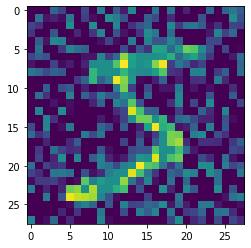

In [6]:
sample_example = noisy_x_train[0]
plt.imshow(sample_example.reshape(28,28))

# Building and fitting the model

Create a keras shallow autoencoder. You are free to experiment with the architecture. Here are some choices that work well enough.

- **input layer**: ...
- **h**: dense layer, hsize neurons,  activation:linear
- **output**: dense layer -- ...

In [7]:
inputs = keras.Input(shape=[numpixels,])
h = keras.layers.Dense(hsize, activation="linear")(inputs)
output = keras.layers.Dense(numpixels , activation="linear")(h)

model = keras.Model(inputs, output)

In [8]:
model.compile(loss="mean_squared_error")
model.summary()

Model: &quot;functional_1&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 342)               268470    
_________________________________________________________________
dense_1 (Dense)              (None, 784)               268912    
Total params: 537,382
Trainable params: 537,382
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(noisy_x_train, x_train.reshape(-1,784), epochs=epochs)

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 1644.7352
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 736.8844
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 651.5212
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 609.4327
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 580.4494
Epoch 6/20
1875/1875 [==============================] - 10s 6ms/step - loss: 565.3621
Epoch 7/20
1875/1875 [==============================] - 10s 6ms/step - loss: 555.3063
Epoch 8/20
1875/1875 [==============================] - 10s 6ms/step - loss: 553.8759
Epoch 9/20
1875/1875 [==============================] - 11s 6ms/step - loss: 545.8033
Epoch 10/20
1875/1875 [==============================] - 9s 5ms/step - loss: 543.2211
Epoch 11/20
1875/1875 [==============================] - 8s 5ms/step - loss: 543.3935
Epoch 12/20
1875/1875 [==============================

&lt;tensorflow.python.keras.callbacks.History at 0x14520a520&gt;

In [10]:
preds = model.predict(noisy_x_test)
preds = preds.clip(0,255).astype(np.uint8)

# Plot results

In [11]:
def plot_imgs_grid(images):
    plt.figure(figsize=(30,10))
    plt.gray()

    for i in range(50):
        ax = plt.subplot(5,10,i+1)
        ax.imshow(images[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

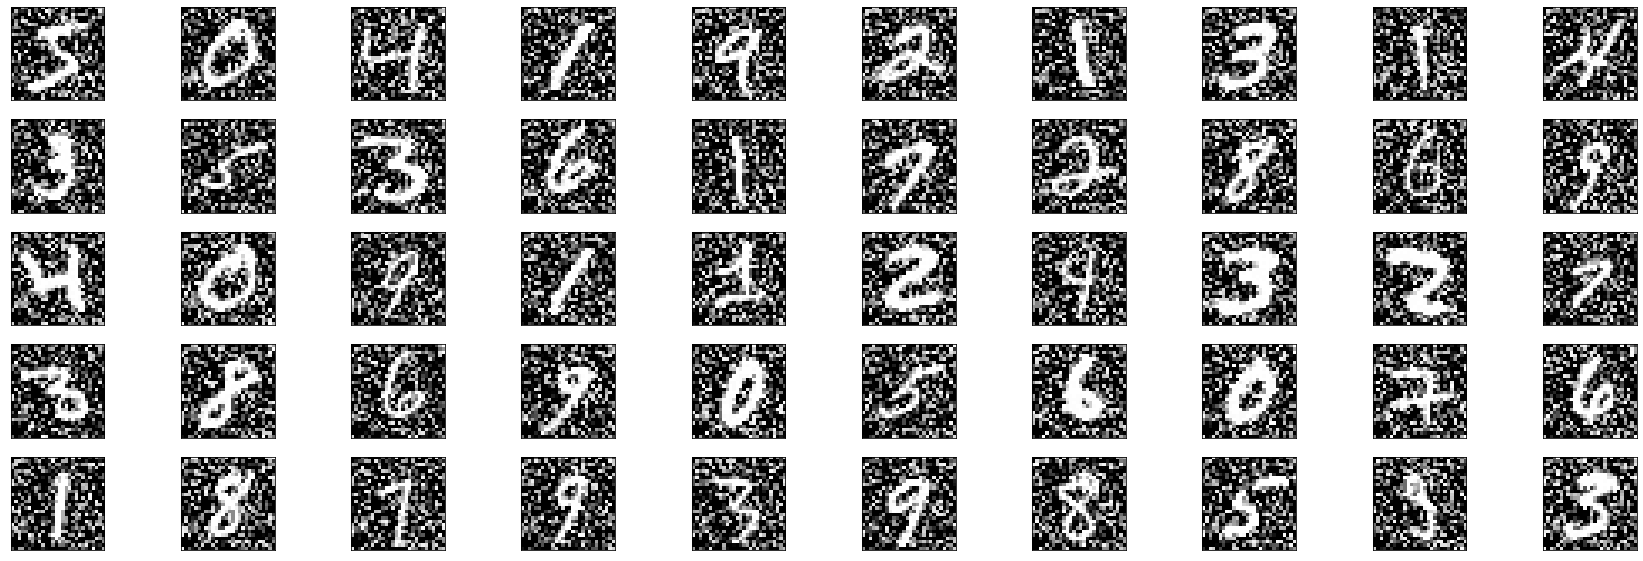

In [12]:
# plots original images
plot_imgs_grid(noisy_x_test.reshape(-1,*imshape))

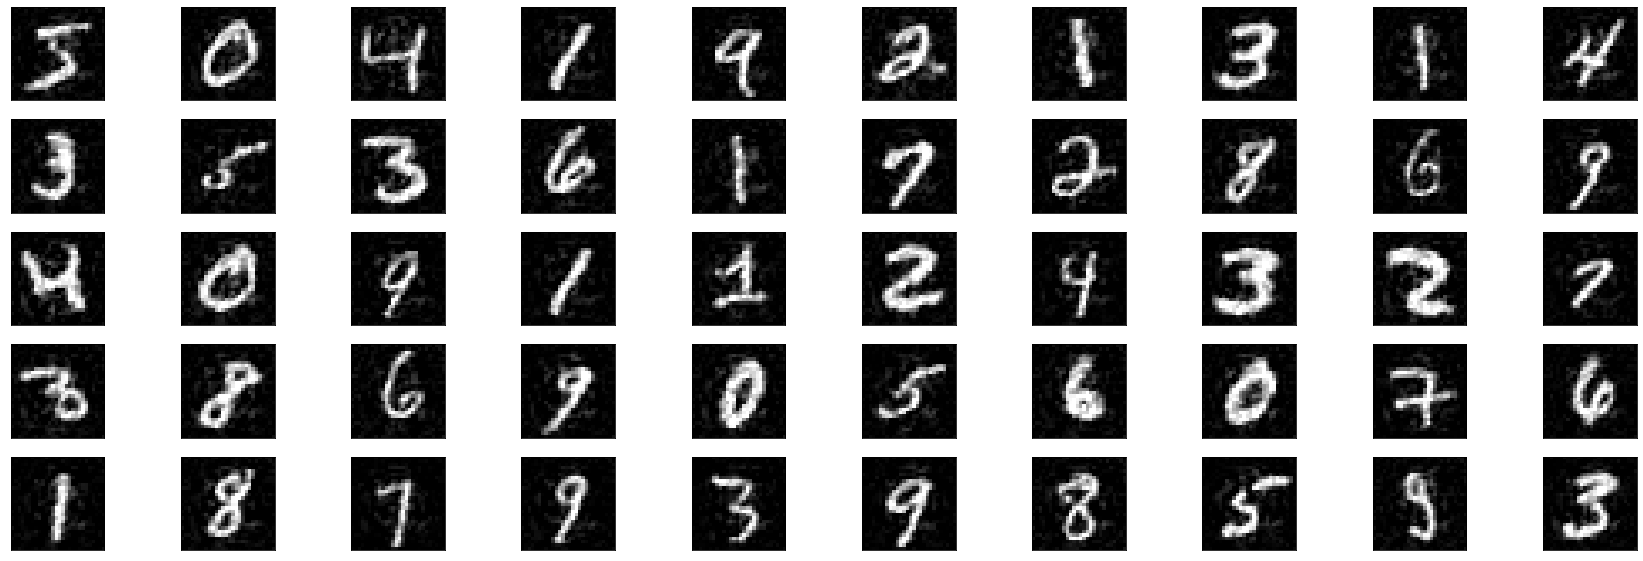

In [13]:
# plots model predictions
plot_imgs_grid(preds.reshape(-1,*imshape))